 ##   <center> Multiple Linear Regression

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.The dataset is downloaded from UCI Machine Learning Repository. 

Dataset: https://archive.ics.uci.edu/ml/datasets/combined+cycle+power+plant

## Attribute Information:

Features consist of hourly average ambient variables
- Temperature (T) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (EP) 420.26-495.76 MW

The averages are taken from various sensors located around the plant that record the ambient variables every second. The variables are given without normalization.

## Import required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Import dataset

In [7]:
data_df=pd.read_csv('D:\ML Projects\Multiple Linear Regresion\CCPP\Folds5x2_pp.csv')

In [8]:
data_df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Define x and y

In [9]:
x=data_df.drop('PE',axis=1)
y=data_df['PE']

In [11]:
print(x)

         AT      V       AP     RH
0     14.96  41.76  1024.07  73.17
1     25.18  62.96  1020.04  59.08
2      5.11  39.40  1012.16  92.14
3     20.86  57.32  1010.24  76.64
4     10.82  37.50  1009.23  96.62
...     ...    ...      ...    ...
9563  16.65  49.69  1014.01  91.00
9564  13.19  39.18  1023.67  66.78
9565  31.32  74.33  1012.92  36.48
9566  24.48  69.45  1013.86  62.39
9567  21.60  62.52  1017.23  67.87

[9568 rows x 4 columns]


In [14]:
print(y)

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64


## Split the dataset into train set and test set

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=0)

## Create and train the model on train set

In [17]:
from sklearn.linear_model import LinearRegression

In [19]:
lr=LinearRegression()

In [20]:
lr.fit(x_train,y_train)

LinearRegression()

## Predict the train set and test set results

In [21]:
y_train_predict=lr.predict(x_train)
y_test_predict=lr.predict(x_test)

## Evaluate the Model

In [23]:
lr.score(x_train,y_train) # tain model score

0.9279441090358653

In [24]:
lr.score(x_test,y_test) # test model score

0.9304112159477682

**Model score's for both train set and test set are almost similar. This shows that our model is a strong model**

In [25]:
for i,col_name in enumerate(x_train.columns):
    print('The coefficient for {} is {}'.format(col_name,lr.coef_[i]))

The coefficient for AT is -1.9643209806499984
The coefficient for V is -0.24009895157335465
The coefficient for AP is 0.06801033592473658
The coefficient for RH is -0.1564532923782331


In [26]:
print('The intercept for our model is {}'.format(lr.intercept_))

The intercept for our model is 448.56131770568805


## Plot the results

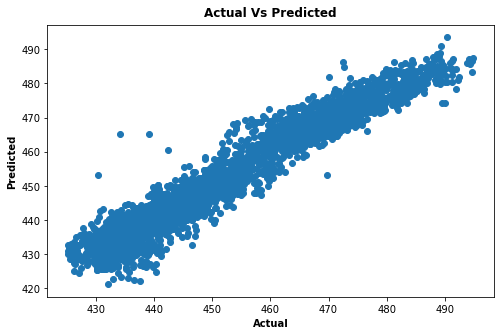

In [44]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,y_test_predict);
plt.title('Actual Vs Predicted',weight='bold',y=1.01)
plt.xlabel('Actual',weight='bold')
plt.ylabel('Predicted',weight='bold')
plt.show()

## Predicted values

In [52]:
predicted_y_df=pd.DataFrame({'Actual':y_test,'Predicted':y_test_predict,'Difference':y_test-y_test_predict})
predicted_y_df[0:20]

,Actual,Predicted,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
9482,432.68,429.676856,3.003144
9,477.50,473.017115,4.482885
4986,459.68,456.532373,3.147627
6168,477.50,474.342524,3.157476
3664,444.99,446.364396,-1.374396


## Using statmodel library to get R type outputs

**The library expects the x and y to be given in one single dataframe**

In [53]:
data_train=pd.concat([x_train,y_train],axis=1)

In [54]:
data_train.head()

,AT,V,AP,RH,PE
4507,15.83,41.67,1013.39,74.12,464.93
287,22.56,62.26,1012.11,63.16,445.33
4018,22.11,59.80,1016.86,70.14,450.62
4624,19.96,56.03,1020.59,64.95,454.67
8507,21.70,70.32,1009.12,91.30,438.52


In [56]:
import statsmodels.formula.api as smf

In [57]:
lm1=smf.ols(formula='PE ~ AT+V+AP+RH',data=data_train).fit()

In [58]:
lm1.params

Intercept    448.561318
AT            -1.964321
V             -0.240099
AP             0.068010
RH            -0.156453
dtype: float64

**We can observe that the results are exactly matching with the values driven using sklearn**

## Inferential Statistics

In [59]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                 2.155e+04
Date:                Sun, 29 May 2022   Prob (F-statistic):               0.00
Time:                        20:05:06   Log-Likelihood:                -19688.
No. Observations:                6697   AIC:                         3.939e+04
Df Residuals:                    6692   BIC:                         3.942e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    448.5613     11.745     38.192      0.0

* R-squared metric is not reliable as it doesnot take into account spurious correlations
* Adjusted R-squared metric accounts for the spurious correlations. It decreases when we include attributes into the model that are weak or poor predictors of y

## <center>Thankyou